Copyright (c) 2017-2018 Andrew Johnson, Dan Kotlyar, Stefano Terlizzi, Gavin Ridley, GTRC

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Cross Section Reader/Plotter

## Basic Operation

Firstly, to get started plotting some cross sections from Serpent, you generate a yourInputFileName_xs.m file using [set xsplot](http://serpent.vtt.fi/mediawiki/index.php/Input_syntax_manual#set_xsplot) as documented on the Serpent wiki. `serpentTools` can then read the output, figuring out its filetype automatically as with other readers. Let's plot some data used in the `serpentTools` regression suite.

In [1]:
import os
import serpentTools
import matplotlib.pyplot as plt
%matplotlib inline

xsreader = serpentTools.read('../serpentTools/tests/plut_xs0.m')

INFO    : serpentTools: Inferred reader for ../serpentTools/tests/plut_xs0.m: XSPlotReader
INFO    : serpentTools: Preparing to read ../serpentTools/tests/plut_xs0.m
INFO    : serpentTools: Done reading xsplot file


This file contains some cross sections from a Serpent case containing a chunk of plutonium metal reflected by beryllium. Let's see what cross sections are available from the file:

In [2]:
xsreader.xsections.keys()

dict_keys(['i4009_03c', 'i7014_03c', 'i8016_03c', 'i94239_03c', 'mbe', 'mfissile'])

Notice that the important part of the reader is the `xsections` attribute, which contains a dictionary of named XSData objects. Entries starting with "i" are isotopes, while "m" preceded names are materials. Notably, materials not appearing in the neutronics calculation, e.g., external tanks in Serpent continuous reprocessing calculations, are not printed in the yourInputFileName_xs.m file.

Plotting the entries is very easy, check this out:

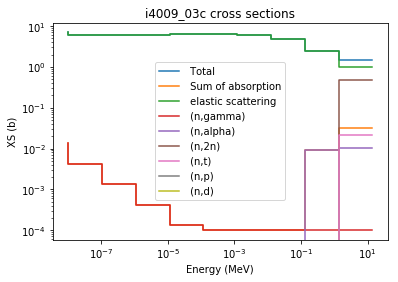

In [3]:
fig = xsreader.xsections['i4009_03c'].plot('all')

This is nice to have an automatically generated legend, but gets somewhat busy quickly. So, it's easy to check which MT numbers are available, and plot only a few:

In [4]:
xsreader.xsections['i4009_03c'].showMT()

MT numbers available for i4009_03c:
-----------------------------------
1     Total
101   Sum of absorption
2     elastic scattering
102   (n,gamma)
107   (n,alpha)
16    (n,2n)
105   (n,t)
103   (n,p)
104   (n,d)


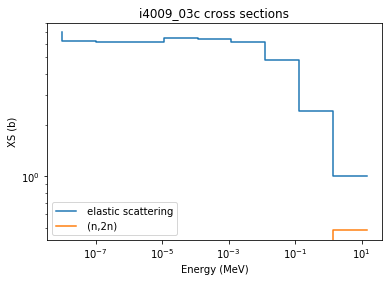

In [5]:
fig2 = xsreader.xsections['i4009_03c'].plot([2, 16])

Of course, the same process can be applied to materials, but Serpent has some special unique negative MT numbers. The code will give you their meaning without requiring your reference back to the wiki.

In [6]:
xsreader.xsections['mfissile'].showMT()

MT numbers available for mfissile:
----------------------------------
-1   Macro total
-3   Macro total elastic scatter
-2   Macro total capture
-6   Macro total fission
-7   Macro total fission neutron production
-16  Macro total scattering neutron production


Note that any extra arguments passed to the plot method get passed on to matplotlib's plotting, and not figure instantiations. So, if you want to change figure options, this goes in its own dictionary:

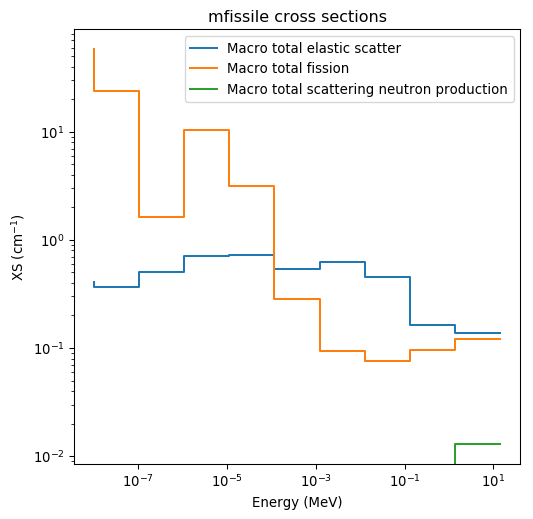

In [8]:
lastfig = xsreader.xsections['mfissile'].plot([-3, -6, -16], 'g', figargs={'dpi':96, 'figsize':(6,6)})

## Conclusions
`serpentTools` can plot your Serpent XS data in a friendly way. We're always looking to improve the feel of the code though, so let us know if there are changes you would like.

Keep in mind that setting an energy grid with closer to 10000 points makes far prettier XS plots however. There were none in this example to not clog up the repository.